2024-09-16 00:35:59.747151: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


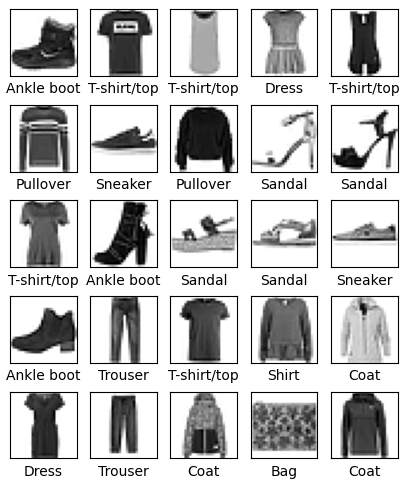

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', #order is important
               'Dress', 'Coat','Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(5,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#modeling 784 to 128 to 10 with reLU


In [2]:
#modeling 784 to 128 to 10 with reLU
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2024-09-16 00:36:14.855763: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [3]:

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 2.5999 - accuracy: 0.6751
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6932 - accuracy: 0.7337
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6261 - accuracy: 0.7642
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5861 - accuracy: 0.7856
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5507 - accuracy: 0.8018
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5202 - accuracy: 0.8209
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5060 - accuracy: 0.8260
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4894 - accuracy: 0.8335
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4814 - accuracy: 0.8350
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - lo

In [4]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=2)
print(test_loss,test_accuracy)

313/313 - 1s - loss: 0.5749 - accuracy: 0.8210 - 1s/epoch - 4ms/step
0.5748931765556335 0.8209999799728394


In [5]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()]) #convert output layer to probability distribution of 10 categories

In [6]:
prediction=probability_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [7]:
prediction

array([[5.9312006e-17, 1.2436931e-13, 0.0000000e+00, ..., 2.6222724e-03,
        1.0852419e-14, 9.9544036e-01],
       [4.3232068e-03, 1.7411719e-03, 6.3637757e-01, ..., 0.0000000e+00,
        4.4293636e-05, 1.5403993e-26],
       [7.8554381e-09, 1.0000000e+00, 3.1672914e-17, ..., 0.0000000e+00,
        3.3678994e-18, 0.0000000e+00],
       ...,
       [4.6091768e-07, 3.8962357e-24, 1.1691613e-17, ..., 0.0000000e+00,
        9.9999952e-01, 7.3825838e-35],
       [9.0406235e-07, 9.9999905e-01, 3.2994119e-14, ..., 0.0000000e+00,
        6.6795327e-13, 0.0000000e+00],
       [4.3349200e-08, 9.2593361e-10, 2.5062095e-08, ..., 1.9921292e-01,
        7.4601457e-02, 4.0119007e-02]], dtype=float32)

In [8]:
print(class_names[np.argmax(prediction[0])])
print(class_names[test_labels[0]])

Ankle boot
Ankle boot


In [9]:
def plot_image(i, prediction_array,answers,image):
    prediction=prediction_array[i]
    true_label=answers[i]
    img=image[i]
    plt.grid=(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label= np.argmax(prediction)

    if predicted_label == true_label:
        color='blue'
    else: color='red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(prediction):2.0f}% ({class_names[true_label]})",
                                color=color)

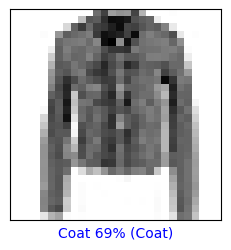

In [10]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)

In [11]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[i], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array[i])

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

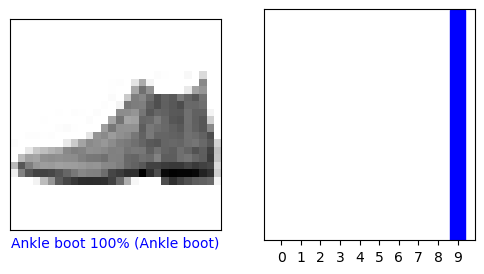

In [12]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  test_labels)
plt.show()

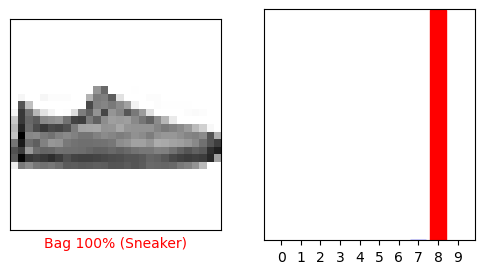

In [13]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  test_labels)
plt.show()

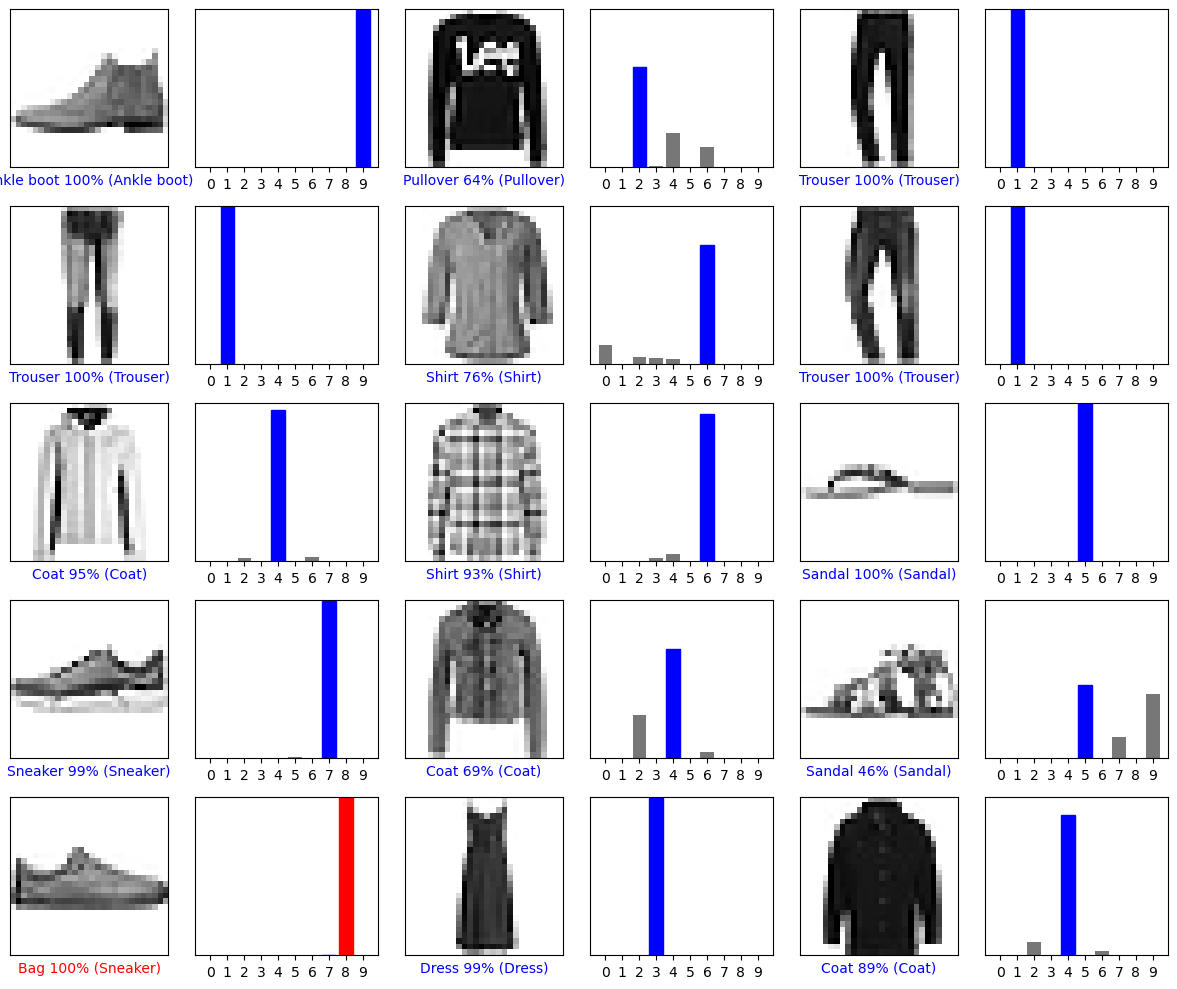

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)
plt.tight_layout()
plt.show()